In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import emcee
import os

import sys
sys.path.insert(0, '../')

In [2]:
from libra import trappist1

planets = list('bcdefgh')

params = [trappist1(planet) for planet in planets]
impact_params = np.array([p.a*np.cos(np.radians(p.inc)) for p in params])
impact_params_upper = np.array([p.a*np.cos(np.radians(p.inc))+p.rp for p in params])
impact_params_lower = np.array([p.a*np.cos(np.radians(p.inc))-p.rp for p in params])

b_range = impact_params_lower.min(), impact_params_upper.max()

In [3]:
impact_params_lower, impact_params_upper

(array([ 0.07380462,  0.06413808,  0.01646409,  0.17090048,  0.25681467,
         0.31919193,  0.33389743]),
 array([ 0.24197121,  0.2307514 ,  0.13589608,  0.30949341,  0.41606291,
         0.49400612,  0.45154096]))

In [4]:
from libra import Star

In [5]:
s = Star.with_trappist1_spot_distribution()
n = 1000
trailed_img = np.ones((n, n))

n_steps = 90

for i in np.ones(n_steps) * 360/n_steps:
    s.rotate(i*u.deg)
    stacked_arr = np.array([s._compute_image(n=n), trailed_img])
    trailed_img = np.min(stacked_arr, axis=0)

../libra/starspots/star.py:473: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


In [6]:
b_range

(0.0164640898853671, 0.49400611585939297)

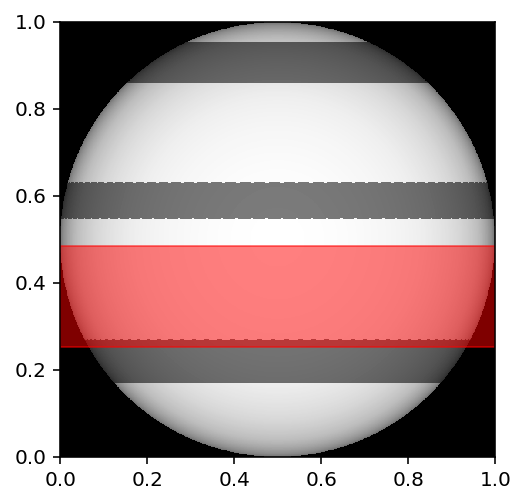

In [7]:
plt.imshow(trailed_img, cmap=plt.cm.Greys_r, extent=[0, 1, 0, 1], origin='lower')

plt.axhspan(0.5-b_range[0], 0.5-b_range[1]/2, color='r', alpha=0.5)
plt.savefig('trappist1_map_onehemisphere.png')

In [8]:
b_range

(0.0164640898853671, 0.49400611585939297)

In [9]:
k2_time, k2_flux, k2_err = np.loadtxt('../libra/data/trappist1/trappist_rotation.txt', unpack=True)
k2_flux /= np.percentile(k2_flux, 95)
k2_time_original, k2_flux_original = k2_time.copy(), k2_flux.copy()
# slice in time
condition = (k2_time > 2457773) & (k2_time < 2457779)
k2_time, k2_flux, k2_err= k2_time[condition], k2_flux[condition], k2_err[condition]

from libra import trappist1_all_transits

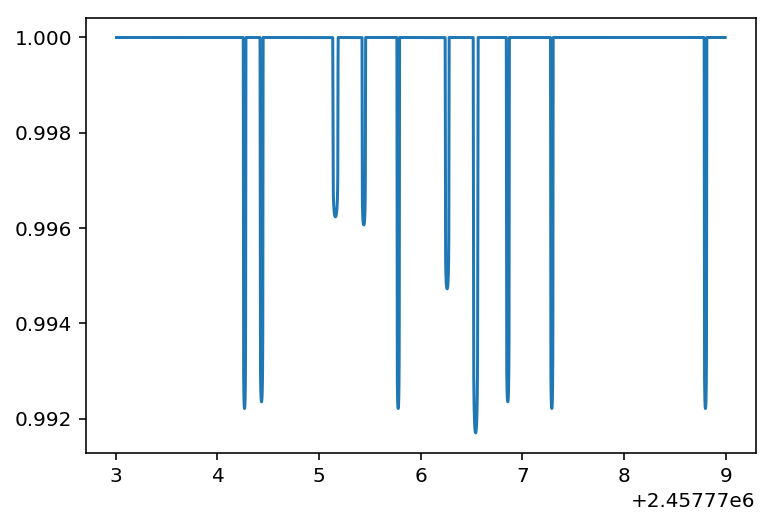

In [10]:
model_times = np.arange(k2_time.min(), k2_time.max(), 1/60/60/24)
model_fluxes = trappist1_all_transits(model_times)

plt.plot(model_times, model_fluxes)

In [11]:
from astropy.io import fits
f = fits.getdata('../libra/data/trappist1/nPLDTrappist.fits')
t, f = f['TIME'] + 2454833.0, f['FLUX']

from scipy.signal import medfilt

f = medfilt(f, (1,))/np.median(f)

(0.98, 1.01)

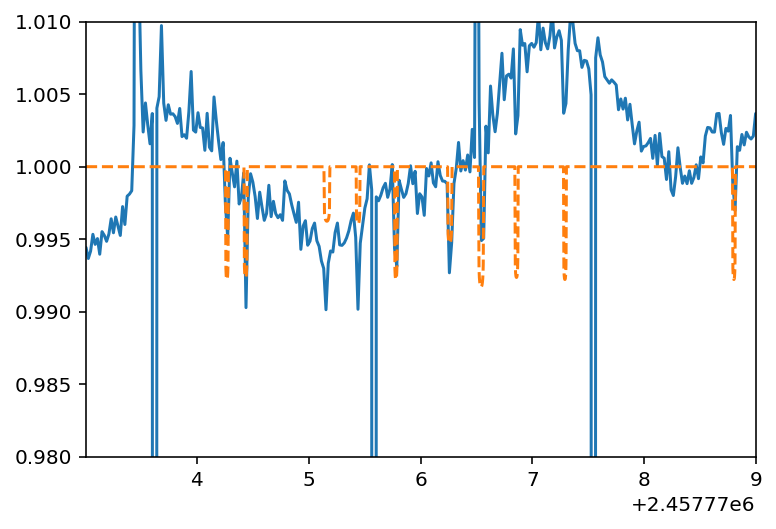

In [12]:
plt.plot(t, f)
plt.plot(model_times, model_fluxes, ls='--')
plt.xlim([k2_time.min(), k2_time.max()])
plt.ylim([0.98, 1.01])

(array([   154.,   1267.,   3038.,   3461.,  13324.,  12384.,   7611.,
          3279.,    398.,     84.]),
 array([-41.37135395, -35.5558579 , -29.74036185, -23.92486581,
        -18.10936976, -12.29387371,  -6.47837767,  -0.66288162,
          5.15261443,  10.96811047,  16.78360652]),
 <a list of 10 Patch objects>)

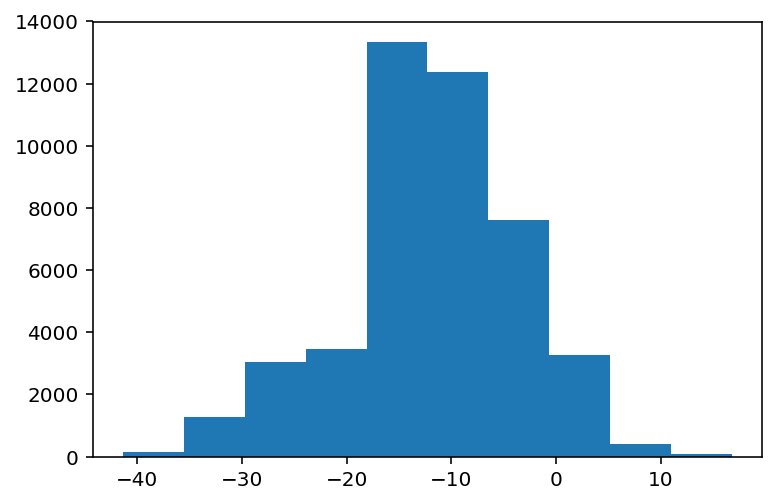

In [16]:
from libra.starspots.star import trappist1_posteriors_path

posteriors = np.loadtxt('trappist1_spotmodel_posteriors.txt')#trappist1_posteriors_path)
plt.hist(posteriors[:, 0:9:3].ravel())

In [17]:
# nsteps = 100
# rotations = 360/nsteps * np.ones(nsteps) * u.deg

# times = 3.3 * np.linspace(0, 1, nsteps)

# #rotoations = np.linspace(0, 360, n_steps) * u.deg
# star = Star.with_trappist1_spot_distribution()

# fluxes = star.fractional_flux(times)

# for i, r in enumerate(rotations):
#     fig, ax = plt.subplots(1, 2, figsize=(8, 4))
#     ax[1].plot(times, fluxes)
#     ax[1].scatter(times[i], fluxes[i], marker='o')
#     star.rotate(r)
#     star.plot(n=500, ax=ax[0])
#     fig.tight_layout()
#     fig.savefig('animation/{0:03d}.png'.format(i), bbox_inches='tight', dpi=200)
#     plt.close()